<a href="https://colab.research.google.com/github/ihagoSantos/image-analysis-and-computer-vision/blob/main/cbir_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Busca de vídeo com base em conteúdo visual


In [1]:
!pip install opencv-contrib-python --upgrade

In [2]:
from os import listdir
from os.path import isfile, join
import os
import os.path
import sys
import pickle

import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# URL Base do diretório
base_url = '/content/drive/My Drive/Pós Graduação PUC Minas/12 - Análise de Imagem e Visão Computacional/Unidade 2/pratica'

frames_dir = "frames/"
features_dir = "features/"
cluster_dir = "cluster/"
bow_dir = "bow/"
videos = "videos/"
search = "search/"

if not os.path.exists(frames_dir):
  os.makedirs(frames_dir)

if not os.path.exists(features_dir):
  os.makedirs(features_dir)

if not os.path.exists(cluster_dir):
  os.makedirs(cluster_dir)

if not os.path.exists(bow_dir):
  os.makedirs(bow_dir)

if not os.path.exists(videos):
  os.makedirs(videos)

if not os.path.exists(search):
  os.makedirs(search)

Nenhuma técnica de detecção de quadro é aplicada nessa etapa. Apenas é obtido um frame por segundo.\
Essa não é a melhor estratégia pois informações podem ser deixadas de fora como alguns quadros, por exemplo. \
Mas isso reduz a quantidade de informações obtidas e processadas.\
Essa estratégia funcionará pois o vídeo é pequeno e é improvável que se tenha mais de uma tomada por segundo. \
Caso o vídeo fosse muito grande, essa estratégia não seria suficiente para reduzir a quantidade de informações pois estariamos pegando muitos quadros do vídeo.

In [5]:
# video path
video = f"{base_url}/airport.mp4"

# create VideoCapture object and read from video file
cap = cv2.VideoCapture(video)

#frames per second
video_frames = 30

# frame_id
id_frame = 0

ret = True
while ret:
  # capture frame by frame
  ret, frame = cap.read() # Enquanto ret for True, o vídeo ainda não acabou de ser processado.

  # vídeo length
  length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

  if (id_frame % video_frames) == 0 and ret: # pega apenas um frame a cada 30
    print(f"Processing frame {id_frame} of {length}")
    frame_path = os.path.join(frames_dir, f"{str(id_frame)}.png")
    #salva imagem (frame) no disco
    cv2.imwrite(frame_path, frame)

  id_frame += 1

print("Done")


Processing frame 0 of 749
Processing frame 30 of 749
Processing frame 60 of 749
Processing frame 90 of 749
Processing frame 120 of 749
Processing frame 150 of 749
Processing frame 180 of 749
Processing frame 210 of 749
Processing frame 240 of 749
Processing frame 270 of 749
Processing frame 300 of 749
Processing frame 330 of 749
Processing frame 360 of 749
Processing frame 390 of 749
Processing frame 420 of 749
Processing frame 450 of 749
Processing frame 480 of 749
Processing frame 510 of 749
Processing frame 540 of 749
Processing frame 570 of 749
Processing frame 600 of 749
Processing frame 630 of 749
Processing frame 660 of 749
Processing frame 690 of 749
Processing frame 720 of 749
Done


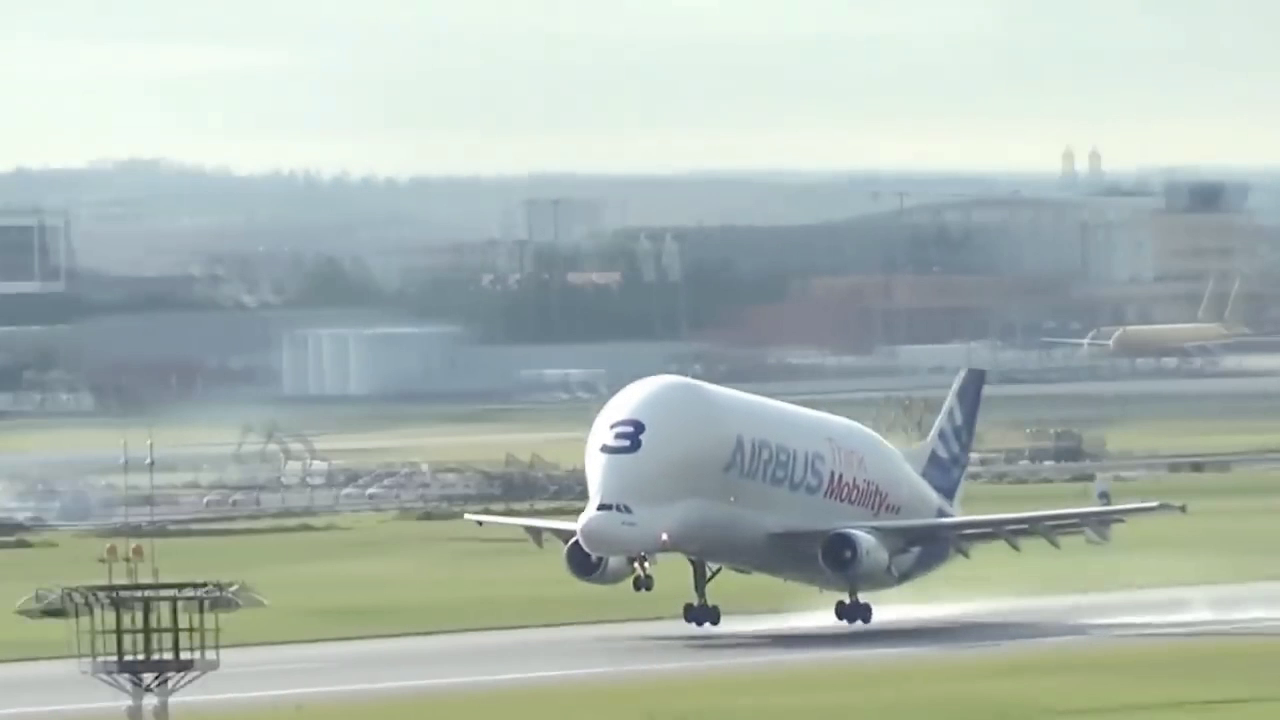

In [6]:
frame = cv2.imread(f"{frames_dir}/450.png")
cv2_imshow(frame)

## Extraindo descritores dos frames do vídeo usando BRIEF Descriptor

In [7]:
# leitura das imagens do diretório
onlyfiles = []
if os.path.exists(frames_dir):
  onlyfiles = [f for f in listdir(frames_dir) if isfile(join(frames_dir, f))]
  print("ONLYFILES", onlyfiles)
  # processa cada arquivo de imagem de um diretório
  for file in onlyfiles:
    print(file)
    img_path = join(frames_dir, file)
    img = cv2.imread(img_path)

    # opcional: redimensiona a imagem
    # img = cv2.resize(
    #     img, (160, 160), interpolation=cv2.INTER_CUBIC
    # )

    # inicializa o STAR detector
    star = cv2.xfeatures2d.StarDetector_create()

    # inicializa o BRIEF descriptor
    brief = cv2.xfeatures2d.BriefDescriptorExtractor_create()

    # acha os keypoints com STAR
    kp = star.detect(img, None)

    # computa os descritores com BRIEF
    kp, feat = brief.compute(img, kp)

    print(len(kp))
    print(np.shape(feat))

    feat_path = join(features_dir, file)

    # salva os descritores no disco em um arquivo .brief
    # o arquivo salvo contém uma lista de características de cada frame
    with open(f"{feat_path}.brief", 'wb') as f:
      pickle.dump(feat.tolist(), f) # pickle armazena em formato binário, reduzindo a quantidade de informação salva no disco


    # f = open(f"{feat_path}.brief.txt", "w")
    # f.write(str(feat.tolist()))
    # f.close()



ONLYFILES ['330.png', '630.png', '120.png', '270.png', '180.png', '360.png', '390.png', '600.png', '60.png', '300.png', '690.png', '660.png', '480.png', '450.png', '90.png', '420.png', '720.png', '150.png', '210.png', '30.png', '570.png', '240.png', '0.png', '510.png', '540.png']
330.png
151
(151, 32)
630.png
496
(496, 32)
120.png
478
(478, 32)
270.png
176
(176, 32)
180.png
507
(507, 32)
360.png
155
(155, 32)
390.png
395
(395, 32)
600.png
503
(503, 32)
60.png
474
(474, 32)
300.png
149
(149, 32)
690.png
469
(469, 32)
660.png
434
(434, 32)
480.png
139
(139, 32)
450.png
209
(209, 32)
90.png
467
(467, 32)
420.png
101
(101, 32)
720.png
59
(59, 32)
150.png
459
(459, 32)
210.png
168
(168, 32)
30.png
477
(477, 32)
570.png
431
(431, 32)
240.png
164
(164, 32)
0.png
419
(419, 32)
510.png
70
(70, 32)
540.png
423
(423, 32)


No OpenCV, StarDetector e BriefDescriptorExtractor são duas funcionalidades usadas em visão computacional para detecção e descrição de características (features) em imagens.

1. StarDetector (STAR - CenSurE)
O StarDetector é um detector de características baseado no algoritmo CenSurE (Center-Surround Extremas). Ele é projetado para detectar pontos de interesse em uma imagem de forma rápida e eficiente. Algumas características do StarDetector:

Baseado em uma abordagem de pirâmide espacial para encontrar cantos e pontos de interesse.
É rotacionalmente invariante e adequado para diferentes escalas.
Tem um desempenho rápido, sendo útil para aplicações em tempo real.
💡 Observação: A classe StarDetector foi removida nas versões mais recentes do OpenCV. Você pode substituí-la por detectores mais modernos como ORB, FAST ou SIFT.

2. BriefDescriptorExtractor (BRIEF)
O BriefDescriptorExtractor (BRIEF - Binary Robust Independent Elementary Features) é um extrator de descritores usado para representar características de uma imagem de maneira compacta. Ele não detecta pontos de interesse, mas descreve os que já foram detectados por um detector (como STAR, FAST, ORB, etc.).

Utiliza um conjunto fixo de pares de pixels para comparar intensidades e gerar um descritor binário.
É rápido e eficiente, tornando-o ideal para sistemas em tempo real.
Funciona melhor com detectores rápidos como FAST ou CenSurE.
💡 Observação: Assim como o StarDetector, o BriefDescriptorExtractor foi descontinuado nas versões mais recentes do OpenCV. O ORB (Oriented FAST and Rotated BRIEF) é um substituto moderno que combina um detector de características (FAST) e um descritor baseado no BRIEF com melhorias.

A principal diferença entre **StarDetector** e **BriefDescriptorExtractor** está na função que cada um desempenha no processo de extração de características em imagens.

### 1. **StarDetector → Detector de Características**  
- **O que faz?** Identifica pontos de interesse (keypoints) em uma imagem.  
- **Como funciona?** Usa o algoritmo **CenSurE (Center-Surround Extremas)** para encontrar regiões da imagem com mudanças significativas, como cantos e bordas.  
- **Saída:** Lista de keypoints (posição, escala e orientação).  

📌 **Exemplo de outros detectores:** FAST, SIFT, ORB, Harris.

---

### 2. **BriefDescriptorExtractor → Extrator de Descritores**  
- **O que faz?** Gera descritores para os keypoints detectados.  
- **Como funciona?** Compara pares de pixels próximos ao ponto de interesse e codifica essas diferenças como um vetor binário.  
- **Saída:** Um vetor de descritores binários para cada keypoint, que pode ser usado para reconhecimento de padrões e matching entre imagens.  

📌 **Exemplo de outros extratores:** SIFT, SURF, ORB, FREAK.

---

### 📌 Diferença essencial:
- **StarDetector encontra os pontos interessantes.**  
- **BriefDescriptorExtractor descreve esses pontos para facilitar o reconhecimento.**  

💡 Para detectar e descrever características, normalmente combinamos os dois. Como os dois foram descontinuados no OpenCV, o **ORB** faz ambos de forma eficiente. 🚀

# Criação do vocabulário visual

## 1. Clusterização

In [9]:
from sklearn.cluster import KMeans
import time

In [20]:
# Arquivos onde irei salvar o vocabulário criado (centroids)
cluster_file = cluster_dir + "cluster.cluster"

In [21]:
# número de clusters
k = 64 # numero de palavras visuais

# número de dimensões das features
dim = 32

In [22]:
# salva o vocabulário criado (centroids) em disco
def saveCentroids (kmeans, output_file, dim):
    i = 0
    desc = ""

    for k in np.nditer(kmeans.cluster_centers_):
        a = np.array(k).round(2)
        desc += str(a) + " "
        i += 1

        if (i % dim) == 0:
            desc += "\n"

    output_file.write(desc)

In [23]:
listOfFeat = []

# leitura das imagens do diretório
onlyfiles = []
if os.path.exists(features_dir):
    onlyfiles = [f for f in listdir(features_dir) if isfile(join(features_dir, f))]

    # processa cada arquivo de imagem de um diretório
    for file in onlyfiles:
        # print(file)

        feat_path = join(features_dir, file)

        with open(feat_path, 'rb') as f:
            # read the data as binary data stream
            feat = pickle.load(f)

        # print(feat)

        for item in feat:
            listOfFeat.append(item)

output_file = open(cluster_file, 'w')

# print( np.asarray(listOfFeat) )
print( np.asarray(listOfFeat).shape )
# output_file.write(np.asarray(listOfFeat[0]))

t1 = time.time()
kmeans = KMeans(n_clusters=k, random_state=0).fit(np.asarray(listOfFeat))
t2 = time.time()
tf = t2 - t1

print(tf)

saveCentroids (kmeans, output_file, dim)
output_file.close()

(7973, 32)
0.28896498680114746


In [18]:
!cat cluster/cluster.cluster

Streaming output truncated to the last 5000 lines.
193.82 206.07 141.33 50.9 196.65 78.8 188.48 100.46 119.7 106.74 86.22 210.71 104.1 55.62 143.82 221.29 150.26 64.61 173.67 103.34 54.35 98.9 33.51 201.17 83.11 81.26 113.9 95.72 46.38 157.23 171.48 42.54 
109.52 106.18 189.81 120.85 205.95 144.14 111.05 206.95 173.86 25.86 158.98 64.62 61.75 149.96 80.28 80.41 77.99 47.07 93.61 171.6 179.65 211.52 96.99 58.01 236.76 111.21 65.56 173.61 107.93 54.91 87.44 96.66 
74.86 141.99 42.62 177.86 60.18 66.12 126.47 84.92 32.71 189.9 100.85 41.73 155.74 211.78 63.15 45.09 103.66 190.87 99.07 149.67 113.77 46.42 175.58 74.58 172.09 95.37 161.23 98.4 96.05 52.78 175.29 206.89 
184.39 216.57 155.64 69.26 206.2 29.51 172.75 161.74 86.62 29.85 135.21 199.55 89.18 109.8 100.73 107.37 45.08 144.87 203.38 105.15 74.83 124.52 66.43 166.53 199.51 67.17 90.45 118.93 31.72 42.01 84.63 44.88 
158.32 89.91 188.83 107.34 221.6 197.37 101.58 165.91 227.48 67.23 191.34 113.01 79.67 49.15 115.79 215.75 98.04 73.9

## 2. Bag of Visual Word

Percorre os arquivos das features (.brief) fazendo uma busca euclidiana dos centroids obtidos no passo anterior. O intuito é encontrar qual o centroid mais próximo de cada feature de cada keyframe. \
Calcula o histograma de ocorrência do centroide em cada um dos frames. \
Os frames agora serão representados não por um conjunto de features e sim por um histograma de ocorrência de cada palavra visual.

In [24]:
%%time
# leitura dos centroids do arquivo
centroids = np.loadtxt(cluster_file)

# obtem o número de centroids (palavras visuais)
clusters = centroids.shape[0]

# leitura das imagens do diretório
onlyfiles = []
if os.path.exists(features_dir):
    onlyfiles = [f for f in listdir(features_dir) if isfile(join(features_dir, f))]

    bowOfImages = []

    # processa cada arquivo de imagem de um diretório
    for file in onlyfiles:

        feat_path = join(features_dir, file)

        with open(feat_path, 'rb') as f:
            # read the data as binary data stream
            feat = pickle.load(f)

        # inicializa o BoW da imagem com zero para cada dimensão
        bow = [0] * clusters

        # procedimento força bruta para cálculo de distância (euclidean distance)
        for item in feat:
            result = sys.float_info.max
            centroid_id = 0

            for id, c in enumerate(centroids):
               # Euclidean Distance
               dist = np.sqrt(np.sum(np.square(np.subtract(item, c))))
               if dist < result:
                  result = dist
                  centroid_id = id

            bow[centroid_id] += 1

        bow_path = join(bow_dir, file)

        with open(bow_path + ".bow", 'w') as f:
            for item in bow:
                f.write("%s " % item)

print("Done")

Done
CPU times: user 8.55 s, sys: 605 ms, total: 9.15 s
Wall time: 9.04 s


In [25]:
!cat bow/450.png.brief.bow

4 3 9 3 2 3 5 2 1 9 1 6 3 6 1 1 1 1 2 4 4 1 2 2 5 7 4 0 4 5 0 4 2 2 3 1 5 3 3 1 7 1 1 0 1 1 0 8 3 3 5 3 5 2 2 9 7 6 4 3 3 0 6 4 

# Realizando Busca
Utilizando um arquivo de BoW de uma imagem do próprio vídeo

In [27]:
%%time
# leitura das imagens do diretório

q = np.loadtxt(bow_dir + "450.png.brief.bow") # imagem para consulta

onlyfiles = []
if os.path.exists(bow_dir):
    onlyfiles = [f for f in listdir(bow_dir) if isfile(join(bow_dir, f))]

    # processa cada arquivo de imagem de um diretório
    for file in onlyfiles:
        feat_path = join(bow_dir, file)

        item = np.loadtxt(feat_path)

        # print(item)
        # print(item.shape)

        dist = np.sqrt(np.sum(np.square(np.subtract(item, q))))

        print(str(file) + ": " + str(dist))

450.png.brief.bow: 0.0
240.png.brief.bow: 27.83882181415011
390.png.brief.bow: 43.104524124504614
720.png.brief.bow: 37.20215047547655
180.png.brief.bow: 54.86346689738081
630.png.brief.bow: 50.547007824400445
120.png.brief.bow: 53.58171329847526
330.png.brief.bow: 26.870057685088806
600.png.brief.bow: 57.07889277132134
210.png.brief.bow: 25.865034312755125
270.png.brief.bow: 25.11971337416094
540.png.brief.bow: 44.67661580737735
60.png.brief.bow: 55.95533933415113
300.png.brief.bow: 24.657656011875904
570.png.brief.bow: 42.5440947723653
360.png.brief.bow: 27.129319932501073
150.png.brief.bow: 47.32863826479693
510.png.brief.bow: 26.962937525425527
480.png.brief.bow: 22.271057451320086
690.png.brief.bow: 47.01063709417264
0.png.brief.bow: 45.60701700396552
420.png.brief.bow: 22.40535650240808
30.png.brief.bow: 53.907327887774215
90.png.brief.bow: 49.15282290977803
660.png.brief.bow: 45.46427168667722
CPU times: user 8.63 ms, sys: 0 ns, total: 8.63 ms
Wall time: 11 ms


## Utilizando uma nova imagem qualquer
Calculando features locais da imagem de consulta.

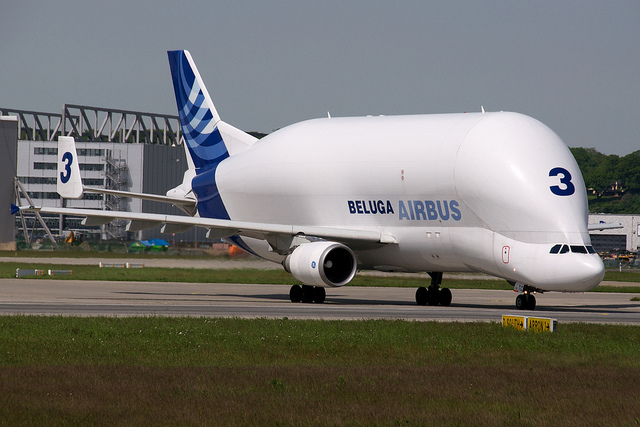

In [38]:
frame = cv2.imread(f"{base_url}/beluga.jpg")
cv2_imshow(frame)

In [39]:
search_dir = "search/"
q = search_dir + "beluga.jpg"

cv2.imwrite(q, frame)

q_feature = q + ".brief"
q_bow = q_feature + ".bow"

In [41]:
img_search = cv2.imread(q)

# Initiate STAR detector
star = cv2.xfeatures2d.StarDetector_create()

# Initiate BRIEF extractor
brief = cv2.xfeatures2d.BriefDescriptorExtractor_create()

# find the keypoints with STAR
kp = star.detect(img_search,None)

# compute the descriptors with BRIEF
kp, feat = brief.compute(img_search, kp)

print(len(kp))
print(np.shape(feat))
print(feat)

# store the data as binary data stream
with open(q_feature, "wb") as f:
  pickle.dump(feat.tolist(), f)


274
(274, 32)
[[ 98  80 229 ...  44  36 220]
 [161  58  79 ... 236 134 213]
 [238 242 245 ...  44  60 220]
 ...
 [ 88  69 236 ...  72 206 241]
 [ 73  15 149 ...  28 175 240]
 [ 92  69 160 ...  69 202 101]]


Calculando BoW da imagem de consulta (observe que o mesmo vocabulário visual calculado anteriormente é utilizado)

In [44]:
# leitura dos centroids do arquivo
centroids = np.loadtxt(cluster_file)

# obtem o número de centroids (palavras visuais)
clusters = centroids.shape[0]

with open(q_feature, 'rb') as f:
  # read the data as binary data stream
  feat = pickle.load(f)

  # inicializa o BoW da imagem com zero para cada dimensão
  bow = [0] * clusters

  # procedimento força bruta para cálculo de distância (euclidean distance)
  for item in feat:
    result = sys.float_info.max
    centroid_id = 0

    for id, c in enumerate(centroids):
      dist = np.sqrt(np.sum(np.square(np.subtract(item, c))))
      if dist < result:
        result = dist
        centroid_id = id

    bow[centroid_id] += 1

    with open(q_bow, 'w') as f:
      for item in bow:
        f.write("%s " % item)

  print("Done")


Done


In [45]:
!cat search/beluga.jpg.brief.bow

4 5 2 8 2 2 4 4 0 4 0 5 1 8 2 4 2 2 4 2 3 3 9 1 7 12 6 2 5 10 5 3 5 3 1 1 2 6 6 0 5 3 6 1 7 0 4 13 4 7 9 7 6 1 3 8 7 7 2 0 5 1 9 4 

Realizando a consulta

In [46]:
# leitura das imagens do diretório

q = np.loadtxt(q_bow)

onlyfiles = []
if os.path.exists(bow_dir):
  onlyfiles = [f for f in listdir(bow_dir) if isfile(join(bow_dir, f))]

  # processa cada arquivo da imagem de um diretório
  for file in onlyfiles:
    feat_path = join(bow_dir, file)

    item = np.loadtxt(feat_path)

    # print(item)
    # print(item.shape)

    dist = np.sqrt(np.sum(np.square(np.subtract(item, q))))

    print(str(file) + ": " + str(dist))


450.png.brief.bow: 22.781571499789035
240.png.brief.bow: 33.075670817082454
390.png.brief.bow: 38.50973902793941
720.png.brief.bow: 44.10215414239989
180.png.brief.bow: 50.48762224545735
630.png.brief.bow: 46.776062254106
120.png.brief.bow: 48.76474136094644
330.png.brief.bow: 33.21144381083123
600.png.brief.bow: 50.62608023538856
210.png.brief.bow: 31.144823004794873
270.png.brief.bow: 31.272991542223778
540.png.brief.bow: 41.36423575989287
60.png.brief.bow: 51.73006862551025
300.png.brief.bow: 29.410882339705484
570.png.brief.bow: 38.45776904605882
360.png.brief.bow: 31.51190251317746
150.png.brief.bow: 43.53159771935783
510.png.brief.bow: 35.41186241925155
480.png.brief.bow: 29.614185789921695
690.png.brief.bow: 42.95346318982906
0.png.brief.bow: 42.36744032862972
420.png.brief.bow: 32.046840717924134
30.png.brief.bow: 50.20956084253277
90.png.brief.bow: 45.639894828976104
660.png.brief.bow: 40.792156108742276


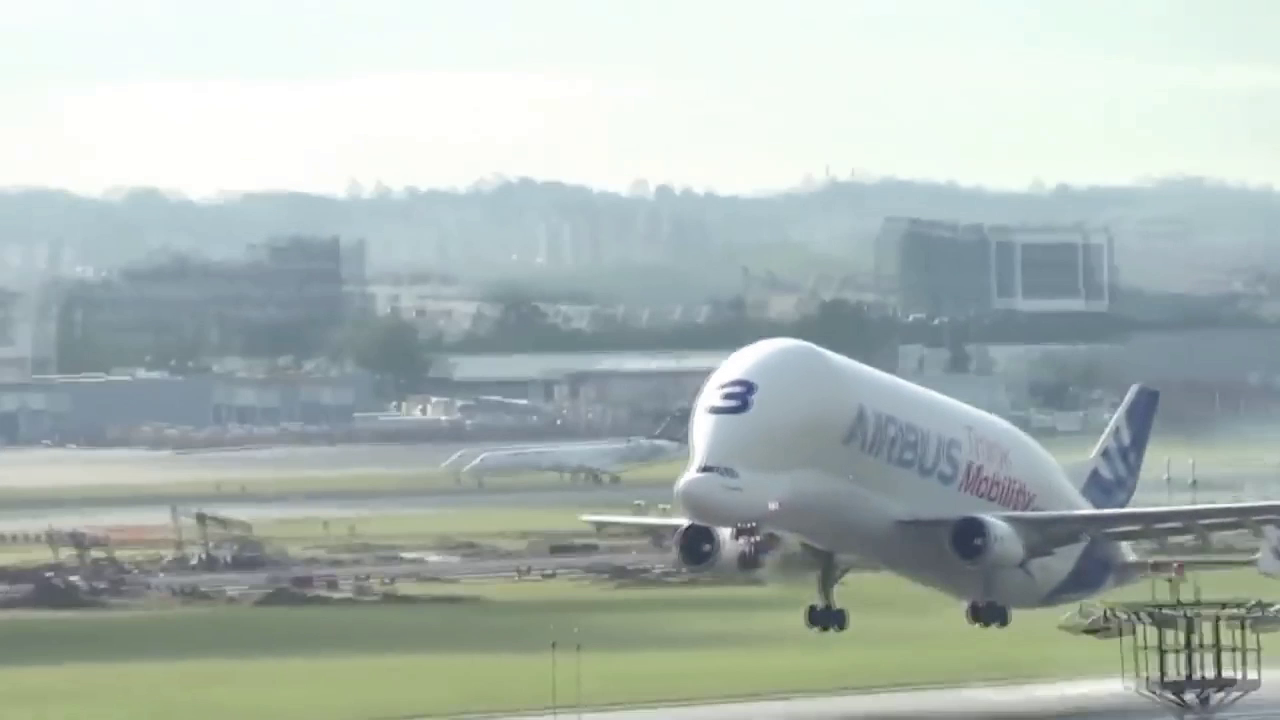

In [47]:
frame = cv2.imread('frames/480.png')
cv2_imshow(frame)
